In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("C:/Users/tapas/AppData/Local/Temp/Temp56f99de7-e8b8-4099-899e-f15d04387132_16258299 (1).zip/DS mat 27th Aug/Footballer.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.shape

(18207, 89)

In [5]:
df.dtypes

Unnamed: 0          int64
ID                  int64
Name               object
Age                 int64
Photo              object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 89, dtype: object

In [6]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [8]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [9]:
df.describe(include='all')

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18207.000000,18207.000000,18207,18207.000000,18207,18207,18207,18207.000000,18207.000000,17966,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,16643
unique,NaN,NaN,17194,NaN,18207,164,164,NaN,NaN,651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1244
top,NaN,NaN,J. Rodríguez,NaN,https://cdn.sofifa.org/players/4/19/158023.png,England,https://cdn.sofifa.org/flags/14.png,NaN,NaN,FC Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,€1.1M
freq,NaN,NaN,11,NaN,1,1662,1662,NaN,NaN,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,557
mean,9103.000000,214298.338606,NaN,25.122206,NaN,NaN,NaN,66.238699,71.307299,NaN,...,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,NaN
std,5256.052511,29965.244204,NaN,4.669943,NaN,NaN,NaN,6.908930,6.136496,NaN,...,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,NaN
min,0.000000,16.000000,NaN,16.000000,NaN,NaN,NaN,46.000000,48.000000,NaN,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,4551.500000,200315.500000,NaN,21.000000,NaN,NaN,NaN,62.000000,67.000000,NaN,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,NaN
50%,9103.000000,221759.000000,NaN,25.000000,NaN,NaN,NaN,66.000000,71.000000,NaN,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,NaN
75%,13654.500000,236529.500000,NaN,28.000000,NaN,NaN,NaN,71.000000,75.000000,NaN,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,NaN


### What is the distribution  of preferred foot?


In [10]:
df['Preferred Foot'].value_counts()

Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

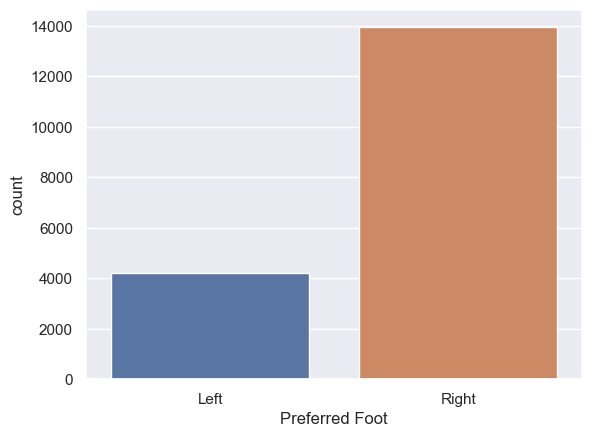

In [11]:
sns.countplot(x='Preferred Foot',data=df)
plt.show()

### How can we visualize the age distribution of players?

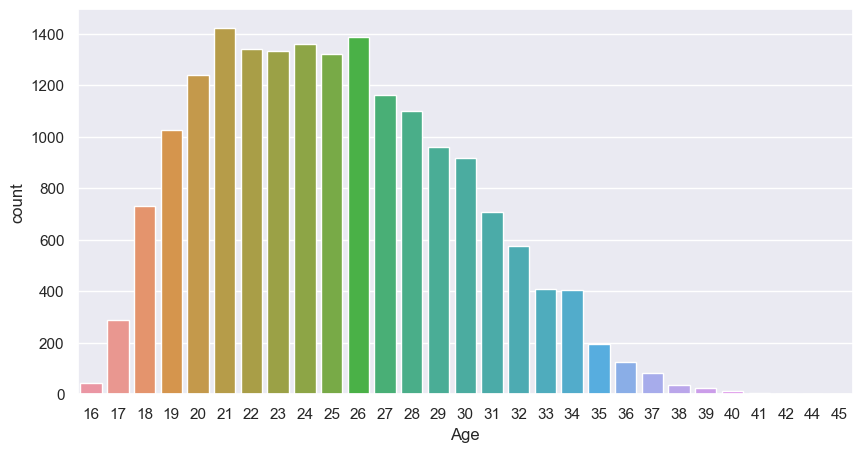

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x='Age',data=df)
plt.show()

### What is the international reputation of left and right foot?

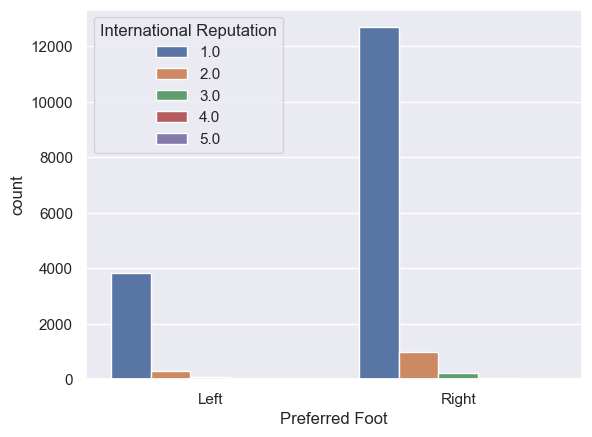

In [13]:
sns.countplot(x="Preferred Foot",hue="International Reputation",data=df)
plt.show()

international reputation of 1 is high in both foot but Right foot exciasive high

### What is the different work rate of the Players?

In [14]:
df['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low', nan], dtype=object)

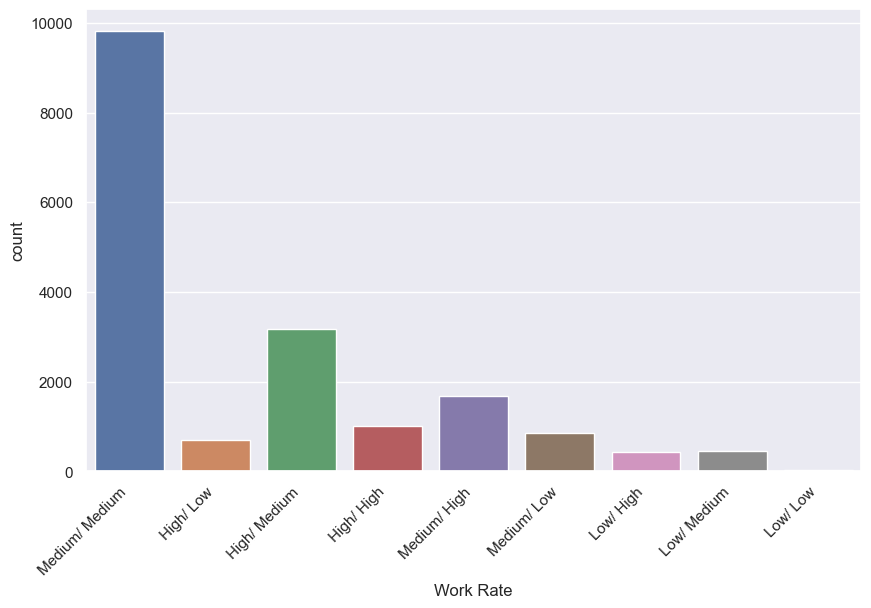

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Work Rate',data=df)
plt.xticks(rotation=45, ha="right")
plt.show()

### Top 10 countries with most number of players

In [16]:
df['Nationality'].value_counts().head(10)

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

### What is the work rate of players segregated by preferred foot?

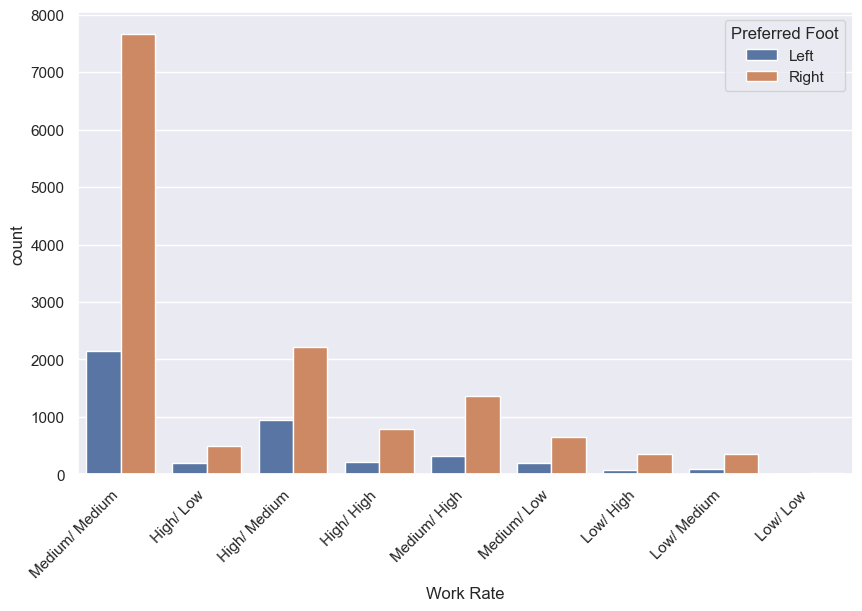

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Work Rate',hue='Preferred Foot',data=df)
plt.xticks(rotation=45, ha="right")
plt.show()

In [18]:
df['Work Rate'].value_counts()

Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

### Number of players at different positions? 



In [19]:
df['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

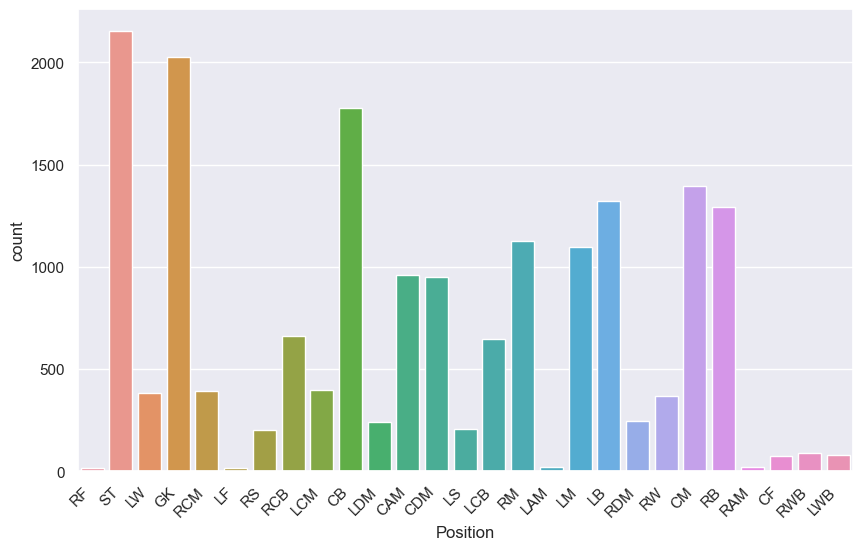

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Position',data=df)
plt.xticks(rotation=45, ha="right")
plt.show()

### Age distribution in top countries

In [21]:
top_countries=df.Nationality.value_counts().head(10).index
top_countries

Index(['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy',
       'Colombia', 'Japan', 'Netherlands'],
      dtype='object')

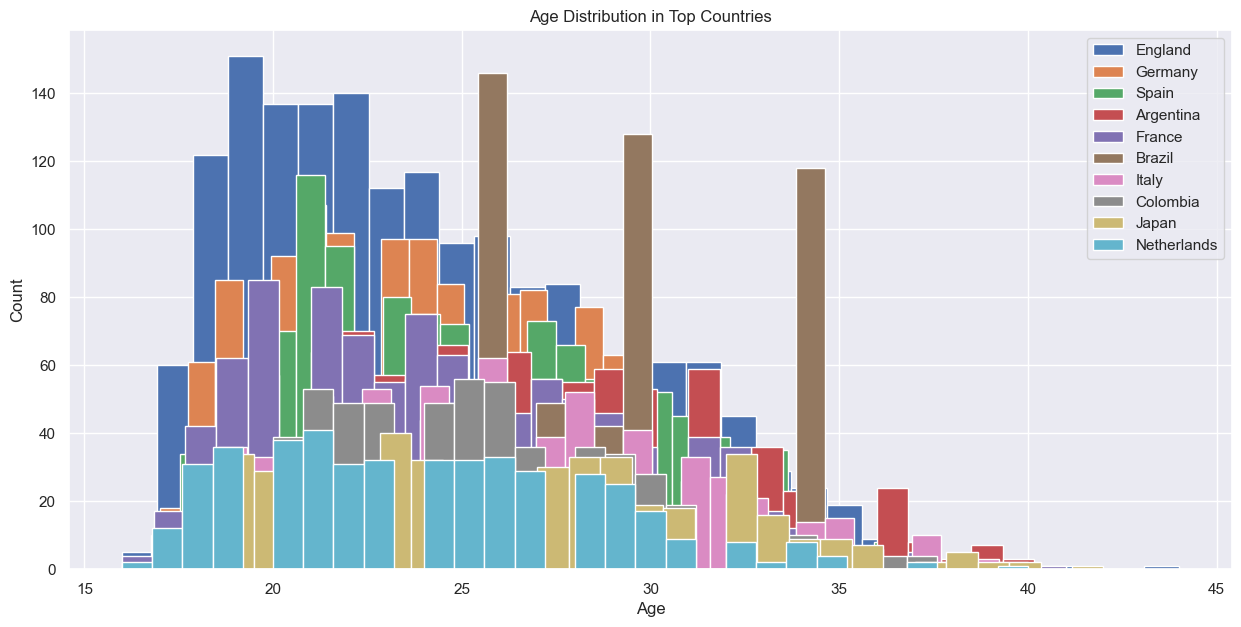

In [45]:
top_countries_data = df[df['Nationality'].isin(top_countries)]


plt.figure(figsize=(15, 7))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['Nationality'] == country]
    plt.hist(x=country_data['Age'],alpha=1,label=country,bins=30)

plt.title("Age Distribution in Top Countries")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()


### What is the distribution of overall score of players from top countries?

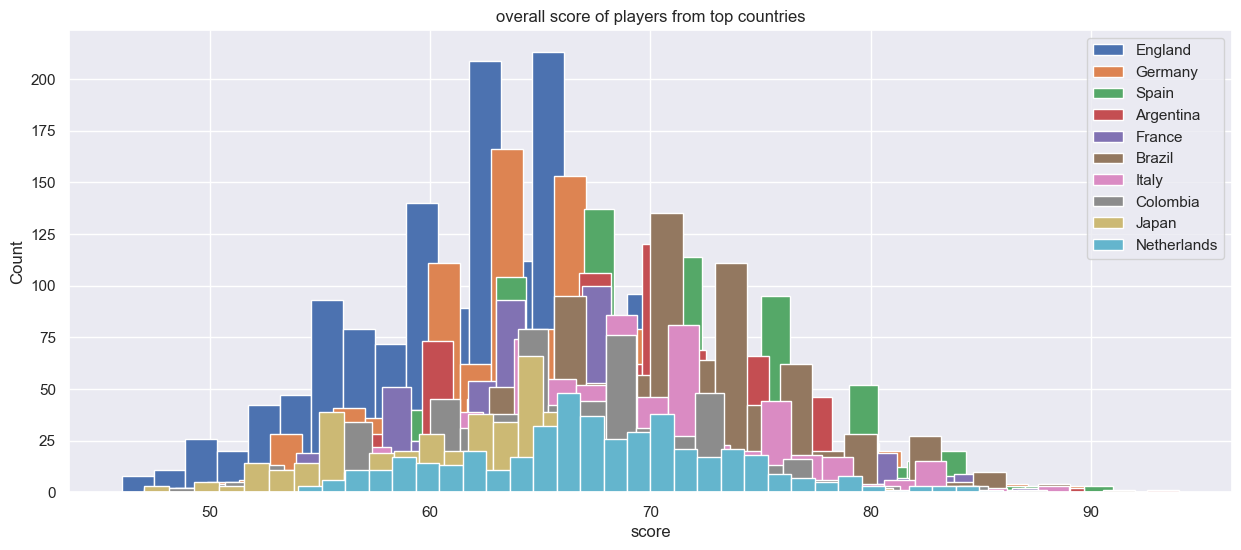

In [41]:
top_countries_data = df[df['Nationality'].isin(top_countries)]

plt.figure(figsize=(15, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['Nationality'] == country]
    plt.hist(x=country_data['Overall'],alpha=1,label=country,bins=30)

plt.title("overall score of players from top countries")
plt.xlabel("score")
plt.ylabel("Count")
plt.legend()
plt.show()